In [1]:
import pandas as pd

df = pd.read_csv('claims.csv')

print(df.head())

   claim_id  time_to_close claim_amount  amount_paid   location  \
0         1            317  R$ 74474.55     51231.37     RECIFE   
1         2            195  R$ 52137.83     42111.30  FORTALEZA   
2         3            183   R$ 24447.2     23986.30   SAO LUIS   
3         4            186  R$ 29006.28     27942.72  FORTALEZA   
4         5            138   R$ 19520.6     16251.06     RECIFE   

   individuals_on_claim linked_cases      cause  
0                    15        False    unknown  
1                    12         True    unknown  
2                    10         True       meat  
3                    11        False       meat  
4                    11        False  vegetable  


### Cleaning and validating the data

Using the data dictionary, the data was validated and cleaned accordingly.

claim_id: There are 2000 unique claim_id values in the dataset, and none of them are null. This means that each claim in the dataset has a unique identifier. No changes were made to this column.

time_to_close: There are 256 unique time_to_close values in the dataset, and none of them are null. This means that the time between when the food was consumed and when the symptoms appeared is known for each claim in the dataset. No changes were made to this column.

claim_amount: There are 2000 unique claim_amount values in the dataset, and none of them are null. This means that the amount of money paid out for each claim is known. The data must be continuous and hence was transformed to a float type. The median value in claim_amout is 24821.08, however there were no null values.

amount_paid: There are 1963 unique amount_paid values in the dataset, ranging from 1516.72 to 52498.75. 36 of them are null. This means that the amount of money paid out for 36 claims is not known. All missing values were replaced with the overall median value of 20105.70

location: There are 4 unique location values in the dataset, and none of them are null. This means that the location of each claim is known. No change was made in this column.

individuals_on_claim: There are 15 unique individuals_on_claim values in the dataset, and none of them are null. This means that the number of individuals who filed a claim for each claim is known. No change was made in this column.

linked_cases: There are 2 unique linked_cases values in the dataset, TRUE or FALSE. 26 of them are null. This means that the values for 26 linked cases is not known. All missing values were replaced with FALSE.

cause: There are 5 unique cause values in the dataset, and none of them are null. Upon careful inspection it is revealed that two values were not entered correctly. Here are the changes made: ' Meat' was updated to 'meat', and 'VEGETABLES' was updated to 'vegetable'

In [2]:
claim_id = df['claim_id']
time_to_close = df['time_to_close']
claim_amount = df['claim_amount']
amount_paid = df['amount_paid']
location = df['location']
individuals_on_claim = df['individuals_on_claim']
linked_cases = df['linked_cases']
cause = df['cause']

print('The unique values of claim_id are', claim_id.nunique())
print('The number of null values of claim_id are', claim_id.isnull().sum())

print('The unique values of time_to_close are', time_to_close.nunique())
print('The number of null values of time_to_close are', time_to_close.isnull().sum())

print('The unique values of claim_amount are', claim_amount.nunique())
print('The number of null values of claim_amount are', claim_amount.isnull().sum())

print('The unique values of amount_paid are', amount_paid.nunique())
print('The number of null values of amount_paid are', amount_paid.isnull().sum())

print('The unique values of location are', location.nunique())
print('The number of null values of location are', location.isnull().sum())

print('The unique values of individuals_on_claim are', individuals_on_claim.nunique())
print('The number of null values of individuals_on_claim are', individuals_on_claim.isnull().sum())

print('The unique values of linked_cases are', linked_cases.nunique())
print('The number of null values of linked_cases are', linked_cases.isnull().sum())

print('The unique values of cause are', cause.nunique())
print('The number of null values of cause are', cause.isnull().sum())

The unique values of claim_id are 2000
The number of null values of claim_id are 0
The unique values of time_to_close are 256
The number of null values of time_to_close are 0
The unique values of claim_amount are 2000
The number of null values of claim_amount are 0
The unique values of amount_paid are 1963
The number of null values of amount_paid are 36
The unique values of location are 4
The number of null values of location are 0
The unique values of individuals_on_claim are 15
The number of null values of individuals_on_claim are 0
The unique values of linked_cases are 2
The number of null values of linked_cases are 26
The unique values of cause are 5
The number of null values of cause are 0


### Updating the claim_amount values to continuous values

In [3]:
print(claim_amount.unique())
print("The existing type of claim_amount is", claim_amount.dtype)

# Removing the currency symbol from the entries
df['claim_amount'] = df['claim_amount'].apply(lambda x : x.split(' ')[-1])

# Updating claim_amount column to float64
df['claim_amount'] = df['claim_amount'].astype(float)

#Updating the figures to two decimal places
df['claim_amount'] = df['claim_amount'].round(2)

print("The updated type of claim_amount is", df['claim_amount'].dtype)

['R$ 74474.55' 'R$ 52137.83' 'R$ 24447.2' ... 'R$ 11975.85' 'R$ 23516.28'
 'R$ 8051.4']
The existing type of claim_amount is object
The updated type of claim_amount is float64


### Checking for nulls in the claim_amount column

In [4]:
print('The number of null values in claim_amount is', df['claim_amount'].isna().sum())

# Calculate the median of non-null values in the 'amount_paid' column
median_value = df['claim_amount'].median(skipna=True)
print("The median value in claim_amount is", round(median_value, 2))

The number of null values in claim_amount is 0
The median value in claim_amount is 24821.08


### Updating the null amount_paid values to the overall median value

In [13]:
# Display the lowest and highest values in the amount_paid column
print("The lowest value in amount_paid is", df['amount_paid'].min())
print("The highest value in amount_paid is", df['amount_paid'].max())

# Calculate the median of non-null values in the 'amount_paid' column
median_value = df['amount_paid'].median(skipna=True)
print("The median value in amount_paid is", round(median_value, 2))

# Replace null values with the median value, rounded to two decimal places
df['amount_paid'].fillna(round(median_value, 2))

# Print the sum of null values in the updated DataFrame column
print("The number of null values in amount_paid is", df['amount_paid'].isnull().sum())

The lowest value in amount_paid is 1516.72
The highest value in amount_paid is 52498.75
The median value in amount_paid is 20105.7
The number of null values in amount_paid is 0


### Updating the null linked_cases values to FALSE

In [15]:
# Changing nan to FALSE
df['linked_cases'].fillna(False)
print("The number of null values in linked_cases is", df['linked_cases'].isnull().sum())
print("The unique values in linked_cases are", df['linked_cases'].unique())

The number of null values in linked_cases is 0
The unique values in linked_cases are [False  True]


### Updating the incorrect cause values to corrected values.

In [17]:
# Update all entries to lowercase
df['cause'] = df['cause'].str.lower()

# Map incorrect entries to the correct ones. i.e., 'vegetables' with 'vegetable'
mapping = {
    'vegetables': 'vegetable',
    ' meat': 'meat'
}

df['cause'].replace(mapping)

# Replace any non-mapped entries with 'unknown'
df['cause'].fillna('unknown')

print("The unique values in cause are", df['cause'].unique())
print("The null values in cause are", df['cause'].isnull().sum())

The unique values in cause are ['unknown' 'meat' 'vegetable']
The null values in cause are 0


## Distribution of location for all claims

C:\Users\De\AppData\Local\Temp\ipykernel_19176\3145124781.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='location', palette=pastel_palette)


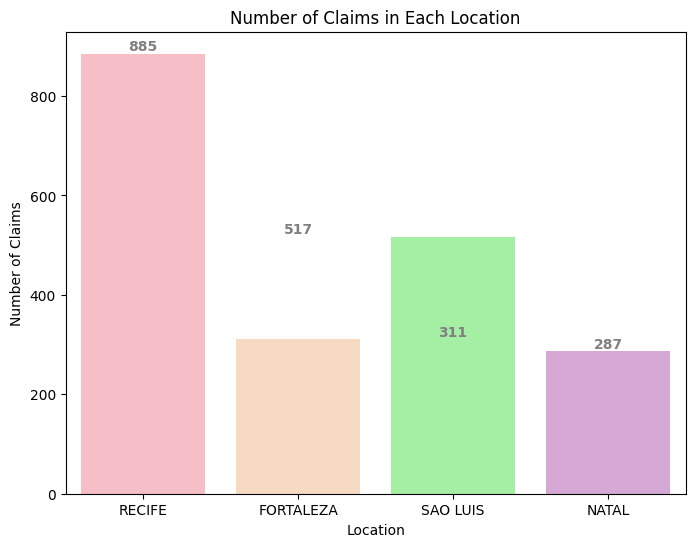

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom pastel color palette
pastel_palette = ['#FFB6C1', '#FFDAB9', '#98FB98', '#DDA0DD']

# Create the visualization - Bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='location', palette=pastel_palette)
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.title('Number of Claims in Each Location')

# Add annotations with the count values directly from the DataFrame
for idx, count in enumerate(df['location'].value_counts()):
    plt.text(idx, count, str(count), ha='center', va='bottom', color='grey', fontweight='bold')

plt.show()

The charts used are the bar chart and the pie chart. The bar chart helped to show the number of claims for each location in color coded bars, along with the numeric value displayed. The pie chart was also employed to visually display the proportions that each location's claims represented.

### Visualizing using a pie chart

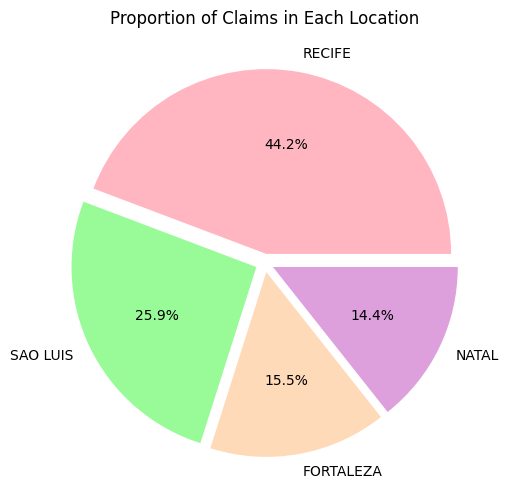

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

pastel_palette = ['#FFB6C1', '#98FB98', '#FFDAB9', '#DDA0DD']

# Get the count of claims in each location
location_counts = df['location'].value_counts()

# Create the visualization - Pie chart using Matplotlib with pastel palette
plt.figure(figsize=(8, 6))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%',explode = [0.05,0.05,0.05,0.05], colors=pastel_palette)
plt.title('Proportion of Claims in Each Location')
plt.show()

The location with the most observations is RECIFE, which boasts a count of 885. This represents 44.2% of the total, followed by SAO LUIS with 25.9%. FORTALEZA and NATAL then follow with 15.5% and 14.4% respectively.

The observations are unbalanced across the categories, with most observations being either RECIFE or SAO LUIS (total of 70.1%). The claims department should focus their efforts to reducing occurrence of food poisoning in these two locations, as it would minimize their losses.

## Distribution of time_to_close for all claims

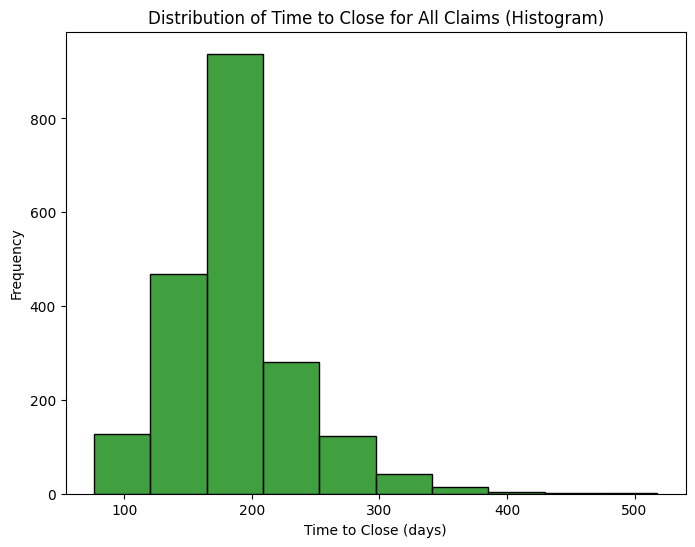

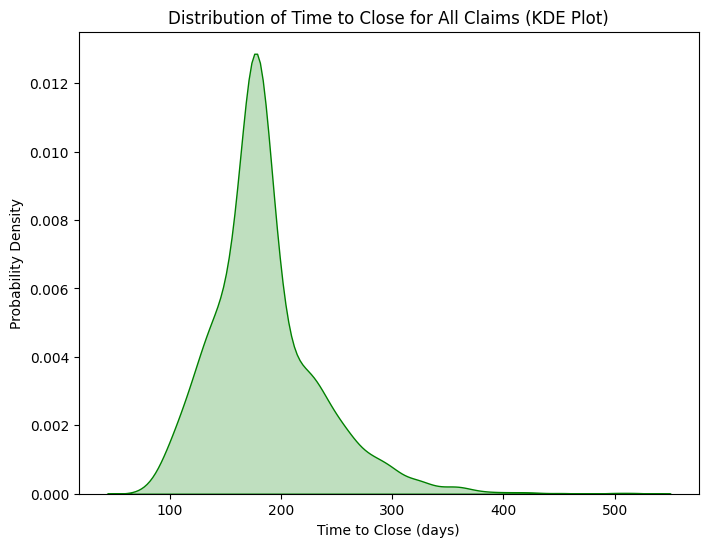

Skewness: 1.2937430932644276
Mean: 185.568
Median: 179.0
Kurtosis: 3.826212089511996


In [22]:
# Chart visualization - Histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='time_to_close', bins=10, kde=False, color='green')
plt.xlabel('Time to Close (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Close for All Claims (Histogram)')
plt.show()

# Chart visualization - KDE plot using Seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='time_to_close', color='green', fill=True)
plt.xlabel('Time to Close (days)')
plt.ylabel('Probability Density')
plt.title('Distribution of Time to Close for All Claims (KDE Plot)')
plt.show()


# Distribution metrics
# Calculate the skewness of the distribution
skewness = df['time_to_close'].skew()
print("Skewness:", skewness)

# Calculate the mean and median of the distribution
mean = df['time_to_close'].mean()
median = df['time_to_close'].median()

print("Mean:", mean)
print("Median:", median)

# Calculate the kurtosis of the distribution
kurtosis = df['time_to_close'].kurtosis()

print("Kurtosis:", kurtosis)

The question asks for an analysis of the distribution of time to close for all the claims. The histogram is perfect for visualizing count or frequency of single variable, hence it was chosen. The KDE plot was also used because it gave a simpler visualization of the skewness of the data.

The visualized chart shows a right-skewness of the variable time_to_close. The variable is positively skewed.

The distribution of the time_to_close variable is positively skewed, as indicated by a positive skewness value (1.2937). This means that the tail of the distribution is stretched out to the right, and there are relatively more claims with shorter time-to-close durations. However, some claims have significantly longer durations and are extreme values.

The mean (185.568) is greater than the median (179.0), which is also characteristic of positively skewed distributions. From a business perspective it takes on average 185 days to close. Noteworthy of mention is that there are exceptional cases where time to close may take over 500 days, as depicted by the long tail to the right.

The kurtosis value (3.8262) indicates that the distribution has heavier tails compared to the normal distribution, which means there are more outliers or extreme values in the data.

In summary, the distribution of time_to_close is positively skewed, with a few claims taking significantly longer to close, resulting in a higher mean compared to the median. The distribution also has heavier tails, suggesting the presence of more outliers or extreme values.

## Relationship between time_to_close and location

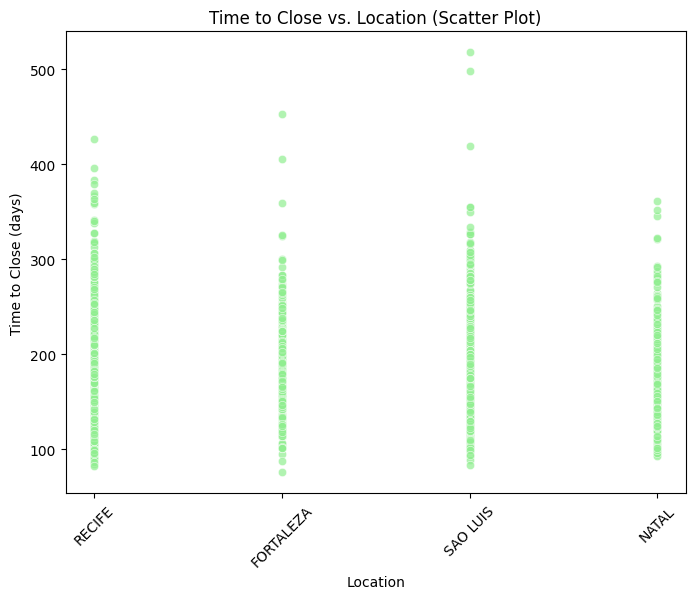

In [23]:
import numpy as np

# Add jitter to the time_to_close values for each location
jitter_amount = 0.3
df['jittered_time_to_close'] = df['time_to_close'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(df))

# Chart visualization - Scatter plot with jitter using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='location', y='jittered_time_to_close', color='lightgreen', alpha=0.7)
plt.xlabel('Location')
plt.ylabel('Time to Close (days)')
plt.title('Time to Close vs. Location (Scatter Plot)')
plt.xticks(rotation=45)
plt.show()

The scatter plot and box plot approaches were chosen because the question required visualization of two variables.

The scatter plot provided a quick-and-easy cursory feedback at a glance, whereas the box plot gave a more in-depth meaning to the data under analysis.

C:\Users\De\AppData\Local\Temp\ipykernel_19176\3407078951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='location', y='time_to_close', palette='pastel')


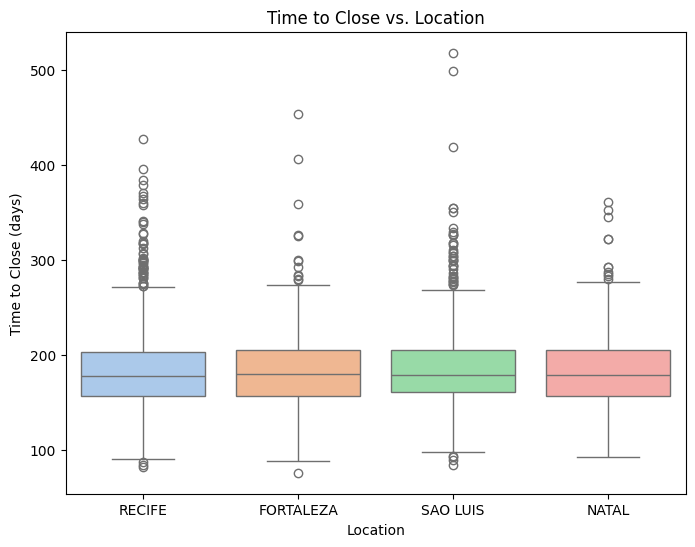

           count        mean        std   min    25%    50%    75%    max
location                                                                 
FORTALEZA  311.0  185.305466  47.583000  76.0  157.0  180.0  205.5  453.0
NATAL      287.0  185.926829  47.059160  93.0  157.0  179.0  205.5  361.0
RECIFE     885.0  184.607910  48.013254  82.0  157.0  178.0  203.0  427.0
SAO LUIS   517.0  187.170213  53.126094  84.0  161.0  179.0  205.0  518.0


In [24]:
# Chart visualization - Box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='location', y='time_to_close', palette='pastel')
plt.xlabel('Location')
plt.ylabel('Time to Close (days)')
plt.title('Time to Close vs. Location')
plt.show()

# Group by 'location' and calculate the statistics for each group
grouped_stats = df.groupby('location')['time_to_close'].describe()

print(grouped_stats)

Average time to close (in days, rounded to 2 decimal places)

RECIFE: 184.61 FORTALEZA: 185.31 NATAL: 185.93 SAO LUIS: 187.17 The time to close closely varies within each location. The box plot summary for time_to_close across four different cities (FORTALEZA, NATAL, RECIFE, and SAO LUIS) indicates that the average time it takes to close a claim is relatively similar, ranging from approximately 184.61 to 187.17 days. The location with averagely the shortest time to close is RECIFE at 184.61

However, the time to close is spread across a wider range. NATAL has the closest range of values for time to close (standard deviation of 47.06), yet averages at 185.93 days because the values are on the higher end of the value range. SAO LUIS has the widest spread (range) of time to close values.

The median time_to_close ranges from approximately 178.0 to 180.0 days, representing the typical or central value. However, the spread of the data varies, with standard deviations ranging from around 47.06 to 53.13 days, suggesting differing levels of variability in claim closing times.

The interquartile range (IQR), which captures the middle 50% of the data, spans approximately 48.5 to 48.7 days. Furthermore, the minimum and maximum values show that claims are closed as quickly as 76 to 93 days and take as long as 361 to 518 days, respectively.

The box plot also reveals potential outliers in each city, which could indicate special cases requiring further investigation by Vivendo.